# TP1 Simulación

## Ejercicio 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from statistics import mean, variance

def own_rand():
    own_rand.x_n = (own_rand.x_n * 1013904223 + 1664525) % (2 ** 32)
    return own_rand.x_n
own_rand.x_n = (97811 + 97811 + 97811)/3


In [5]:
result_1a = [own_rand() for i in range(6)]
result_1a

[192755738, 1392371123, 1950649466, 726488403, 2540951770, 1889127667]

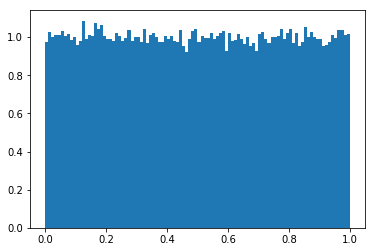

In [6]:
def own_rand_u():
    return float(own_rand())/(2**32)

def rand_u_vector(n):
    return [own_rand_u() for i in range(n)]
result_1b = rand_u_vector(10**5)
plt.hist(result_1b, bins=100, density=True)
plt.show()

## Ejercicio 2

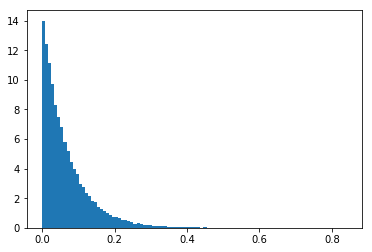

In [7]:
def make_exponential_dist_inverse(lamda):
    def inverse_dist(u):
        return -math.log(u)/lamda
    return inverse_dist

inverse_dist = make_exponential_dist_inverse(15)
inverse_dist = np.vectorize(inverse_dist)

exponential_sample = inverse_dist(rand_u_vector(10**5))

bins_values, bins_edges, _ = plt.hist(exponential_sample,bins=100, density=True)
bins_exp = zip(bins_values, bins_edges[:-1])
plt.show()

In [8]:
mean_exp = mean(exponential_sample)
mode_exp = max(bins_exp, key=(lambda x: x[0]))[1] # Use the first argument as the key to be maxed but return the left edge of the bin which it belongs to
variance_exp = variance(exponential_sample, mean_exp)
mean_exp, mode_exp, variance_exp

(0.06677860080096004, 3.0159397593723117e-07, 0.004490784081843774)

## Ejercicio 3

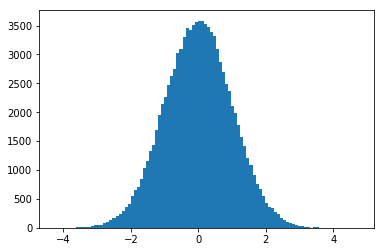

In [9]:
def make_normal_dist_inverse(mu, sigma):
    def inverse_dist(u):
        return norm.ppf(u) * sigma + mu
    return inverse_dist

normal_inverse_dist = make_normal_dist_inverse(0, 1)
normal_inverse_dist = np.vectorize(normal_inverse_dist)
normal_sample = normal_inverse_dist(rand_u_vector(10**5))
bins_values, bins_edges, _ = plt.hist(normal_sample, bins=100)
bins_normal = zip(bins_values, bins_edges[:-1])
plt.show()

In [10]:
mean_normal = mean(normal_sample)
mode_exp = max(bins_exp, key=(lambda x: x[0]))[1] # Use the first argument as the key to be maxed but return the left edge of the bin which it belongs to
variance_exp = variance(normal_sample, mean_normal)
mean_exp, mode_exp, variance_exp

(0.06677860080096004, 3.0159397593723117e-07, 0.9942178036316688)

***Note: Compared with the expected value(0,0,1), the ones generated are pretty close***

## Ejercicio 4

In [13]:
def norm_pdf(x, loc, scale):
    return norm.pdf(x, loc=loc, scale=scale)

def make_norm_acc_rej(loc=0, scale=1):
    def norm_acc_rej():
        start = True
        while start or y > norm_pdf(x, loc, scale):
            start = False
            x = (own_rand() - 0.5) * scale + loc
            y = own_rand() * norm_pdf(loc, loc, scale)
        return y
    return norm_acc_rej

def norm_acc_rej_vector(qty, loc=0, scale=1):
    own_acc_rej = make_norm_acc_rej(loc, scale)
    return [own_acc_rej() for i in range(qty)]

normal_sample2 = norm_acc_rej_vector(10, 35, 5)

bins_values, bins_edges, _ = plt.hist(normal_sample2, bins=100, color='#ff000055', density=True)
bins_normal = zip(bins_values, bins_edges[:-1])

normal_control_group = [np.random.rand() for i in range(10**5)]
plt.hist(normal_sample2, bins=100, color='#00ff0055', density=True)
                                    
plt.show()


KeyboardInterrupt: 

# Ejercicio 5

In [18]:
def inv_distribution(u):
    if u <= 0.5:
        return 1
    elif u <= 0.7:
        return 2
    elif u <= 0.8:
        return 3
    else:
        return 4
    
inv_distribution_vector = np.vectorize(inv_distribution)
sample = inv_distribution_vector(rand_u_vector(10**5))

initial_values = 
{0 for i in range(4)}
categorical_hist = reduce(lambda values_vector, x: values_vector[x - 1] += 1, 
                          sample,
                          initial_values)

plt.plot(categorical_hist)
plt.show()

SyntaxError: invalid syntax (<ipython-input-18-9548cf7179cf>, line 15)

In [19]:
reduce??